# Dataset Creation

In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [2]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


# Normalization

In [4]:
ninja_data_norm = (ninja_data - ninja_data.mean()) / ninja_data.std()
ninja_data_norm.head()

,Time,Temperature,Pressure,Chemical Concentration
0,-1.729454,0.253054,1.444895,-0.206291
1,-1.725992,0.071093,1.468476,-0.187444
2,-1.722530,0.160811,1.375573,0.101064
3,-1.719067,0.346135,1.412122,0.004856
4,-1.715605,0.302714,1.420026,0.170552


In [11]:
# Fourier Transformation on Temperature and Pressure
temperature_fft = np.fft.fft(ninja_data['Temperature'])
pressure_fft = np.fft.fft(ninja_data['Pressure'])

# Frequency components
frequency = np.fft.fftfreq(ninja_data.shape[0], d=(time[1] - time[0]))

# Amplitude of the Fourier Transform
temperature_amplitude = np.abs(temperature_fft)
pressure_amplitude = np.abs(pressure_fft)

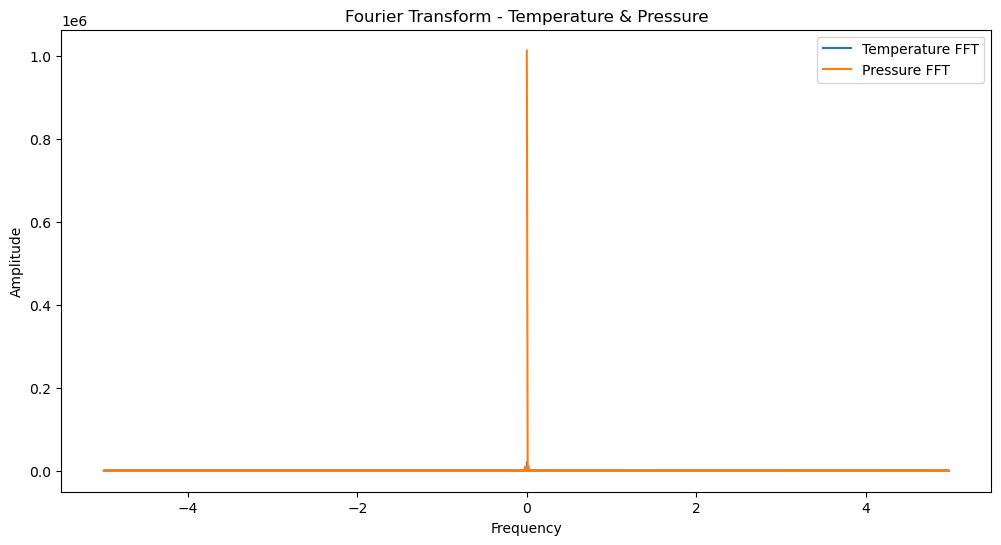

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(frequency, temperature_amplitude, label='Temperature FFT')
plt.plot(frequency, pressure_amplitude, label='Pressure FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Temperature & Pressure')
plt.legend()
plt.show()

# Descriptive statistics

In [8]:
# Descriptive statistics
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


# Correlation matrix

In [14]:
correlation_matrix = ninja_data.corr()

correlation_matrix

,Time,Temperature,Pressure,Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000


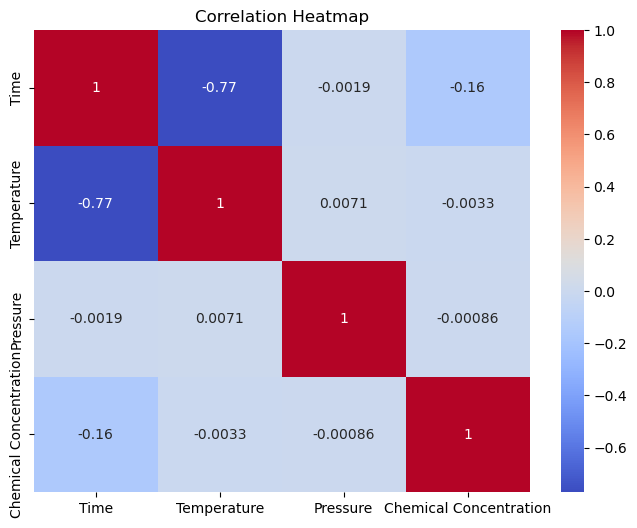

In [15]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pearson correlation between temperature and pressure

In [10]:
from scipy.stats import pearsonr

corr_temp_press, p_value = pearsonr(ninja_data['Temperature'], ninja_data['Pressure'])

corr_temp_press, p_value

(0.0071122920672516896, 0.8222655963580467)